# Contexte

Market Basket Analysis(Wordcloud):

In the retail sector, this analysis is used to discover patterns and relationships within transactions and transaction items-sets (Items frequently bought together).

IBM puts it as:
“Market Basket Analysis is used to increase marketing effectiveness and to improve cross-sell and up-sell opportunities by making the right offer to the right customer. For a retailer, good promotions translate into increased revenue and profits. The objectives of the market basket analysis models are to identify the next product that the customer might be interested to purchase or to browse.”

This explanation gives the intent of running the analysis: “to improve cross-sell and up-sell opportunities.

# Import

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# First we need to install the following modules to get apriori algorithm and the word cloud outputs.Ignore if installed.
#!pip install mlxtend(# For directly installing in jupyter nb)
#!pip install wordcloud(# For directly installing in jupyter nb)
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
# Loading the data
data=pd.read_excel("OnlineRetailData.xlsx")
# glimpse of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France


In [3]:
# Columns of the dataset
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
# Shape of the data 
data.shape

(45985, 8)

In [5]:
# Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    45985 non-null  object        
 1   StockCode    45985 non-null  object        
 2   Description  45985 non-null  object        
 3   Quantity     45985 non-null  int64         
 4   InvoiceDate  45985 non-null  datetime64[ns]
 5   UnitPrice    45985 non-null  float64       
 6   CustomerID   44707 non-null  float64       
 7   Country      45985 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.8+ MB


In [6]:
# Missing values count
data.isna().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1278
Country           0
dtype: int64

In [7]:
# Exploring the different unique countries of transactions
data.Country.unique()

array(['France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE',
       'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark',
       'Cyprus', 'Sweden', 'Austria', 'Israel', 'Finland', 'Bahrain',
       'Greece', 'Hong Kong', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Brazil', 'USA', 'European Community', 'Malta', 'RSA'],
      dtype=object)

In [8]:
# Checking different number of unique countries present in this dataset
x = data['Country'].nunique()
print("There are {} number of unique countries.".format(x))

There are 36 number of unique countries.


In [9]:
# Total number of unique transactions
a=len(data['InvoiceNo'].unique())
print("There are a total of {} unique transactions.".format(a))

There are a total of 2393 unique transactions.


In [10]:
# checking how many unique customer IDs are there
b = data['CustomerID'].nunique()
print("There are {} number of different customers.".format(b))

There are 418 number of different customers.


# Cleaning the data

In [11]:
# Removing the extra spaces in the description column using strip()
data['Description'] = data['Description'].str.strip()
# Changing the type of invoice_no to string to help in removing the transactions cancelled/done on credit
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
# Dropping all transactions which were cancelled/done on credit 
data = data[~data['InvoiceNo'].str.contains('C')]
# Checking the shape of the data after removing the transactions which were cancelled
data.shape

(44553, 8)

# Export data

In [12]:
data. to_csv('base_sql_basket. csv')

# Visualizing

/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTAT

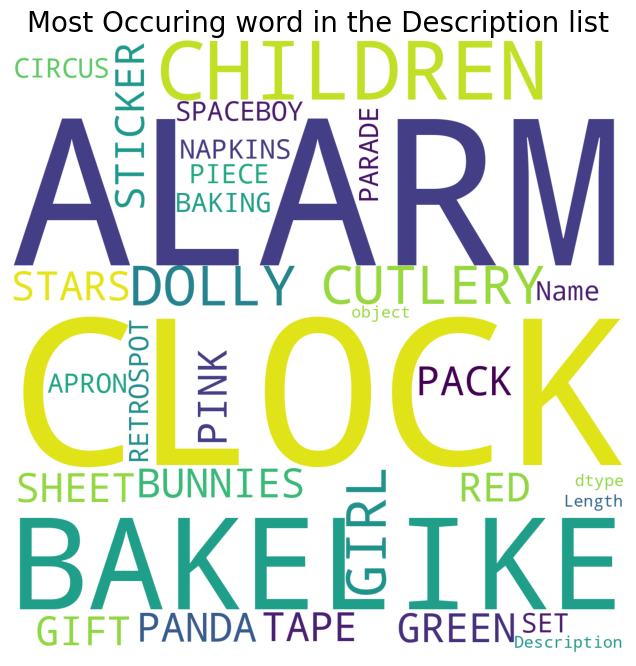

In [13]:
# Worcloud for description of all countries
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate(str(data['Description']))
print(wordcloud)
plt.rcParams['figure.figsize'] = (8, 8)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

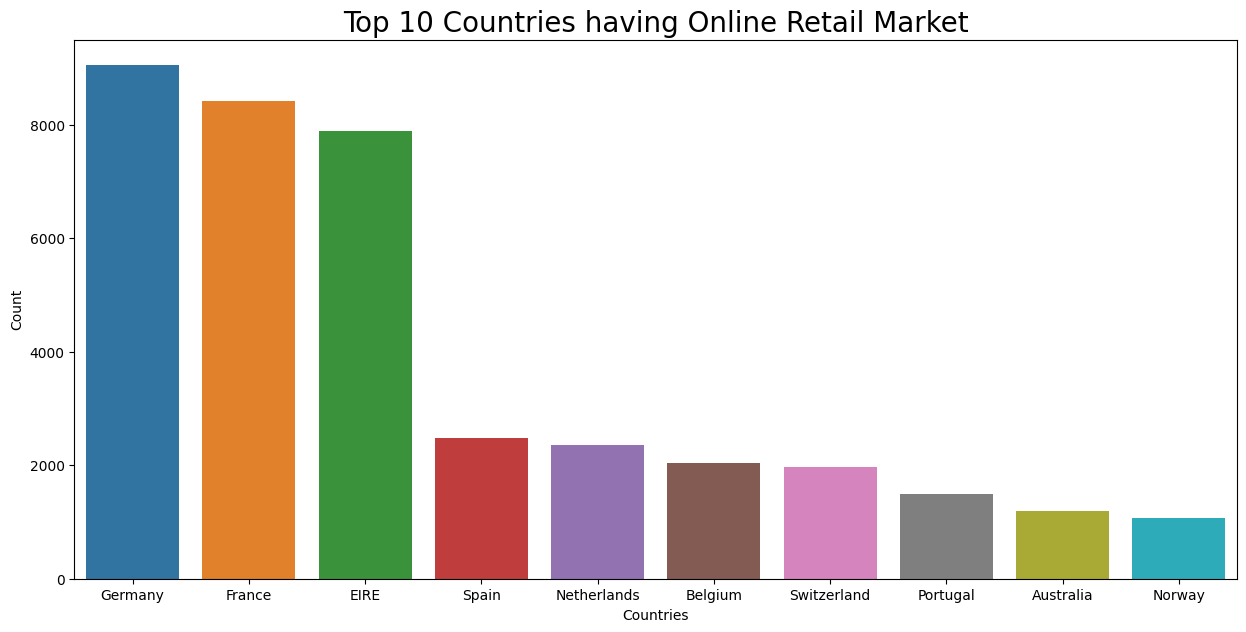

In [14]:
# checking count for countries in the dataset
plt.figure(figsize=(15,7))
sns.countplot(x=data.Country,order=data.Country.value_counts().iloc[:10].index)
plt.title('Top 10 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

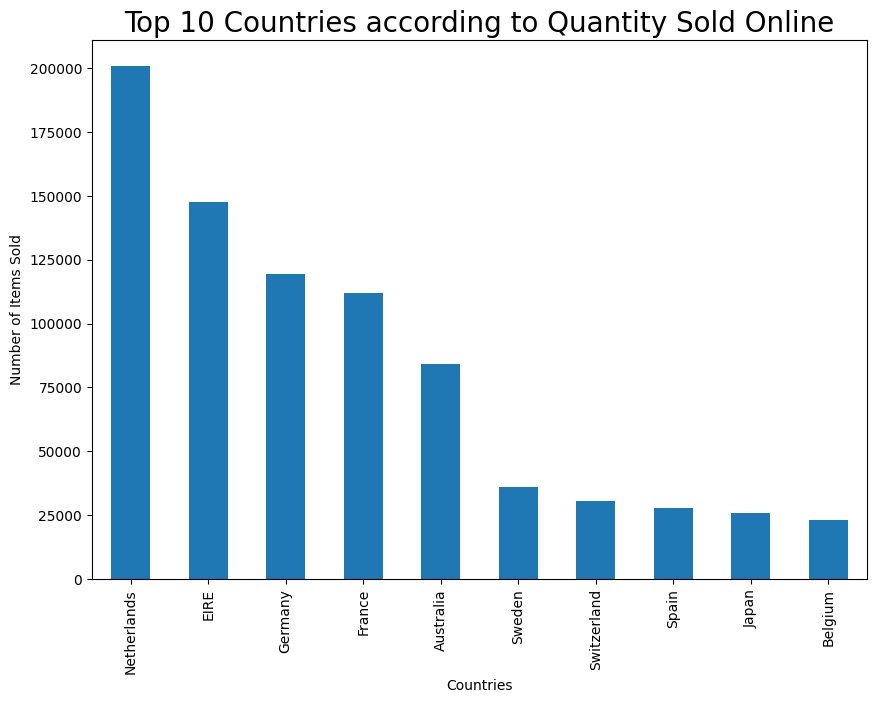

In [15]:
# Having a look at the top 10 Countries in terms of Quantities according to the countries
data['Quantity'].groupby(data['Country']).agg('sum').sort_values(ascending = False).head(10).plot.bar(figsize = (10, 7))
plt.title('Top 10 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Countries')
plt.ylabel('Number of Items Sold')
plt.show()

## Splitting the data according to the region of the transaction (Taking three countries):

/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
 

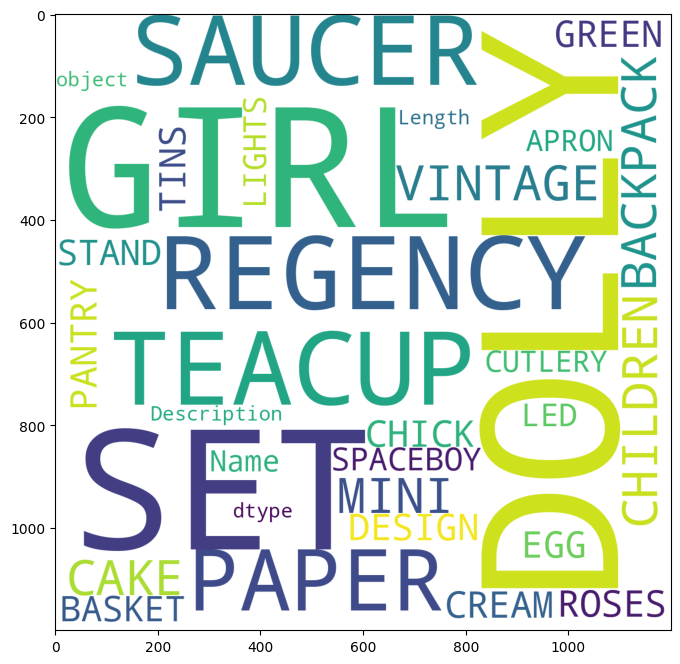

In [16]:
# Transactions done in France 
basket_France = (data[data['Country'] =="France"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
basket_France.shape
(392, 1563)
# Grouping description based on countries 
z=data['Description'].groupby(data['Country'])
p=[]
q=[]
for name,group in z:
    p.append(name)
    q.append(group)
# Items description of France country through Wordcloud
wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate(str(q[15]))
plt.imshow(wordcloud)

/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTAT

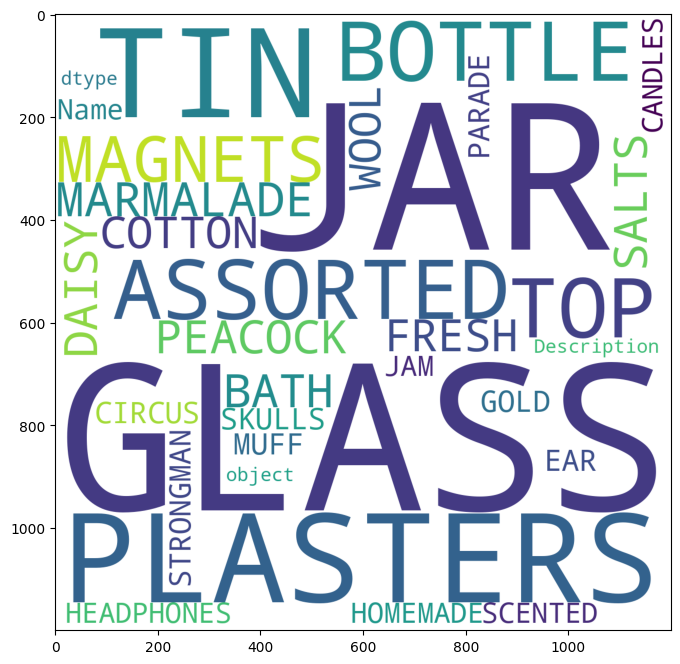

In [17]:
# Transactions done in Portugal 
basket_Por = (data[data['Country'] =="Portugal"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
basket_Por.shape
(58, 713)
# Items description of Portugal country through Wordcloud
wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate(str(q[29]))
plt.imshow(wordcloud)

/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTAT

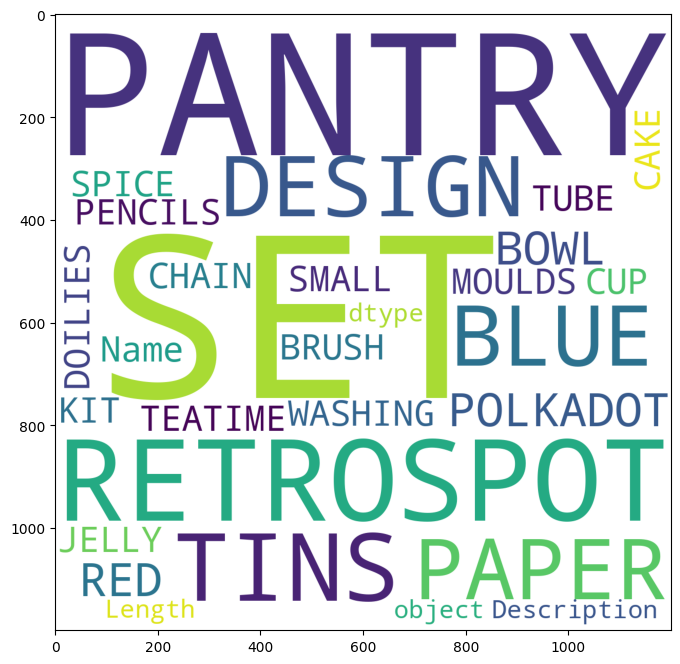

In [18]:
# Transactions done in Sweden
basket_Sweden = (data[data['Country'] =="Sweden"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
basket_Sweden.shape
(36, 261)
# Items description of Sweden country through Wordcloud
wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate(str(q[34]))
plt.imshow(wordcloud)

/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will b

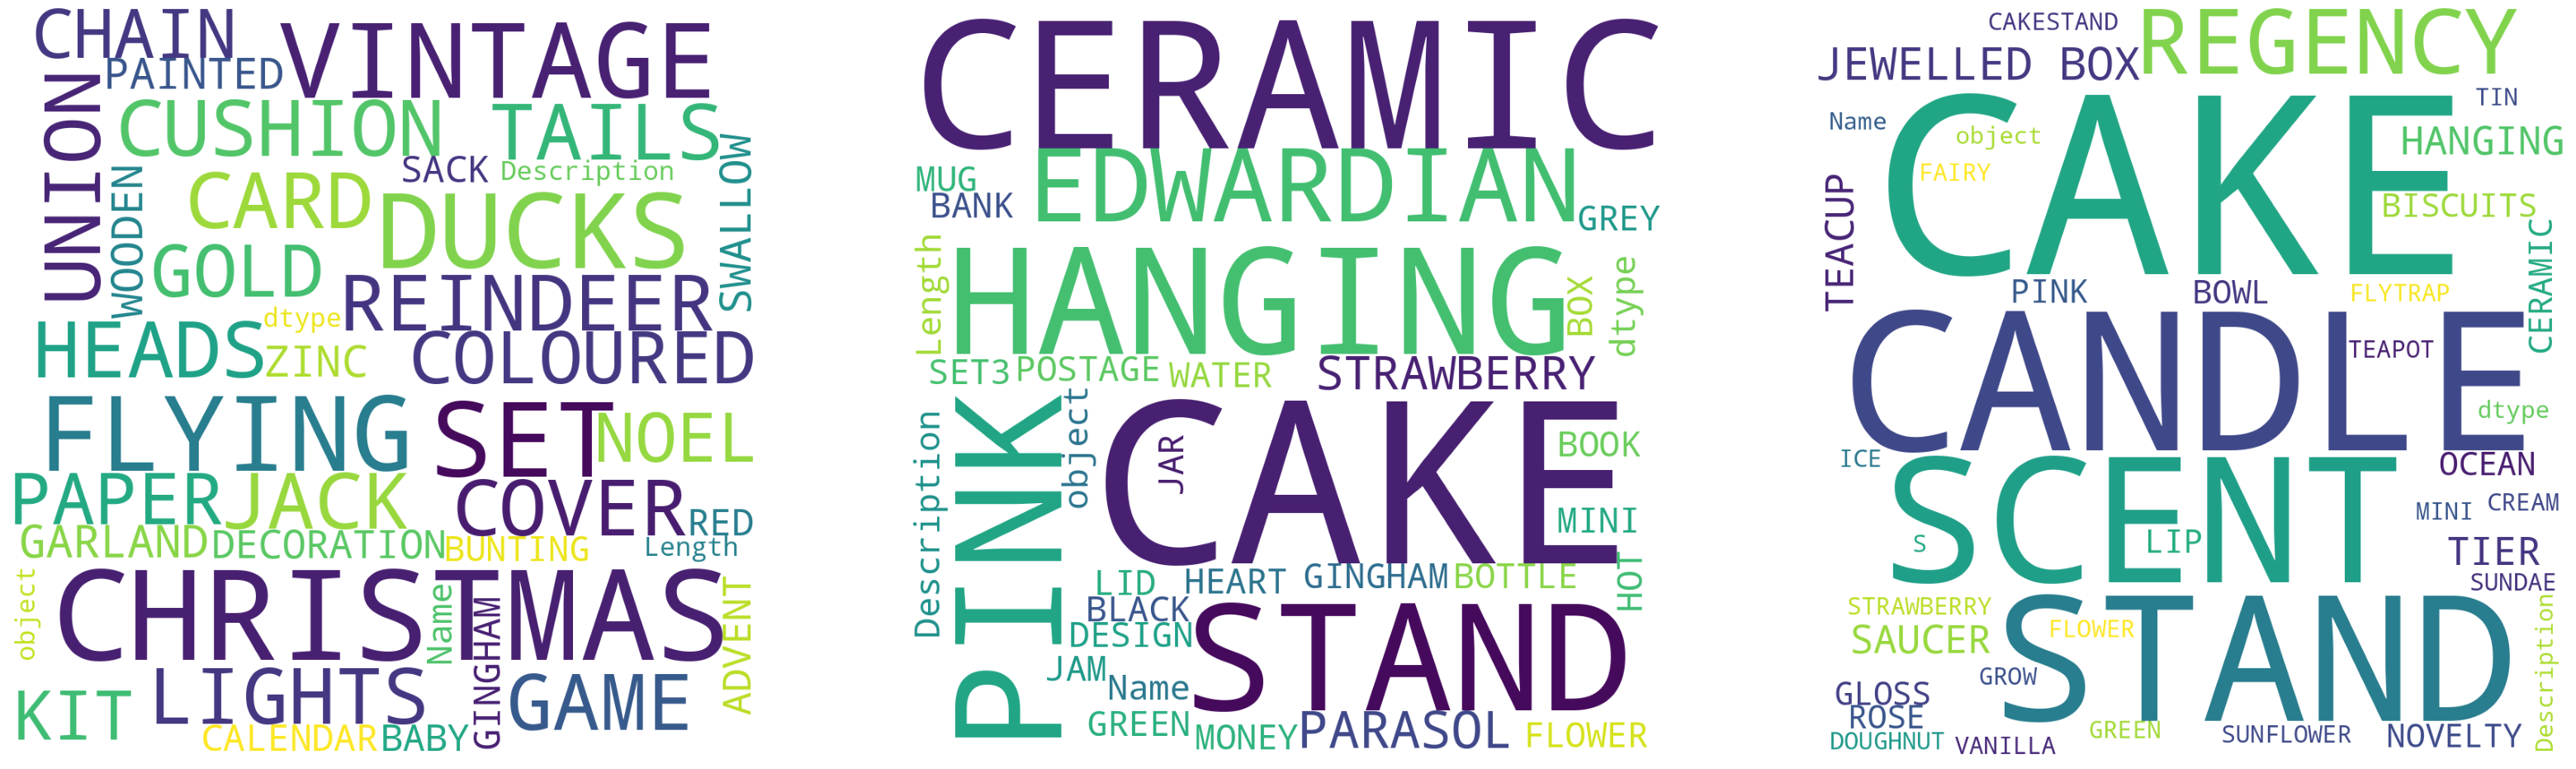

In [19]:
# Comparing item descriptions for different countries
def topicWordCloud(WCwidth, WCheight):
    wordcloud = WordCloud(background_color = 'white',width=WCwidth, height=WCheight,random_state=42).generate(str(q[i]))
    return wordcloud
fig = plt.figure(figsize=(40,40))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    wordcloud=topicWordCloud(1000,1000)
    ax.imshow(wordcloud)
    ax.axis('off')

## Hot Encoding the data:

In [20]:
# Defining the hot encoding function to make the data suitable for the concerned libraries 
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1
# Encoding the datasets (Considering only 3 countries..can be extended)
  
basket_encoded = basket_France.applymap(hot_encode) 
basket_France = basket_encoded
  
basket_encoded = basket_Por.applymap(hot_encode) 
basket_Por = basket_encoded 
  
basket_encoded = basket_Sweden.applymap(hot_encode) 
basket_Sweden = basket_encoded

## Building the models and analyzing the results:

### France:

In [21]:
# Building the model 
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.076531,0.765306,0.076531,1.000,1.306667,0.017961,inf
259,"(PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...",(POSTAGE),0.051020,0.765306,0.051020,1.000,1.306667,0.011974,inf
271,"(PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...",(POSTAGE),0.053571,0.765306,0.053571,1.000,1.306667,0.012573,inf
302,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975,7.644000,0.086474,34.897959
300,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975,7.077778,0.085433,34.489796


### Portugal:

In [22]:
# Building the model 
frq_items = apriori(basket_Por, min_support = 0.05, use_colnames = True)
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1170,(SET 12 COLOUR PENCILS DOLLY GIRL),(SET 12 COLOUR PENCILS SPACEBOY),0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
1171,(SET 12 COLOUR PENCILS SPACEBOY),(SET 12 COLOUR PENCILS DOLLY GIRL),0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
1172,(SET 12 COLOUR PENCILS DOLLY GIRL),(SET OF 4 KNICK KNACK TINS LONDON),0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
1173,(SET OF 4 KNICK KNACK TINS LONDON),(SET 12 COLOUR PENCILS DOLLY GIRL),0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
1174,(SET 12 COLOUR PENCILS DOLLY GIRL),(SET OF 4 KNICK KNACK TINS POPPIES),0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf


### Sweden:

In [23]:
# Building the model
frq_items = apriori(basket_Sweden, min_support = 0.05, use_colnames = True)
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

/home/ellana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(12 PENCILS SMALL TUBE SKULL),(PACK OF 72 SKULL CAKE CASES),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
1,(PACK OF 72 SKULL CAKE CASES),(12 PENCILS SMALL TUBE SKULL),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
4,(ASSORTED BOTTLE TOP MAGNETS),(36 DOILIES DOLLY GIRL),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
5,(36 DOILIES DOLLY GIRL),(ASSORTED BOTTLE TOP MAGNETS),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
180,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY CIRCUS PARADE),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
